### Theory of GAN (Generative Adversarial Networks):

GANs consist of two neural networks: a generator and a discriminator, which are trained simultaneously through a competitive process.

1. **Generator (G)**: This network takes random noise as input and generates fake data samples (in our case, fashion images).

2. **Discriminator (D)**: This network aims to distinguish between real (from the training set) and fake (generated by the generator) samples.

During training, the generator tries to produce samples that are indistinguishable from real data, while the discriminator tries to correctly classify real and fake samples. As training progresses, both networks improve until the generator produces high-quality samples.

### Building Generator and Discriminator Models for Fashion MNIST:

#### 1. Generator Model:
- Input: Random noise vector (latent space).
- Output: Synthetic fashion images.
- Architecture: Typically consists of transpose convolution layers followed by activation functions like ReLU and a sigmoid function at the output to scale pixel values between 0 and 1.

#### 2. Discriminator Model:
- Input: Fashion images (real or synthetic).
- Output: Probability of the input being real.
- Architecture: Convolutional layers followed by activation functions like LeakyReLU, and finally a sigmoid function to produce a probability score.

Let's code the generator and discriminator models:

```python
import tensorflow as tf
from tensorflow.keras import layers, Sequential

# Generator model
def build_generator(latent_dim):
    model = Sequential([
        
    ])
    return model

# Discriminator model
def build_discriminator(input_shape):
    model = Sequential([
    ])
    return model

```

These models define the architecture for the generator and discriminator. Now, you can train them using Fashion MNIST data. If you need help with training or further explanation, feel free to ask!

# 1. Importing Dependencies and Data

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import numpy as np
import keras


## 1.2 setting GPU memory Growth

In [2]:
# Setting GPU memory growth
gpus = tf.config.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## 1.3 Download data from tensorflow dataset

In [37]:
# Brining in tensorflow datasets for fashion mnist
import tensorflow_datasets as tfds
# Bringing in matplotlib for viz stuff
from matplotlib import pyplot as plt

In [38]:
# Use the tensorflow datasets api to bring in the data source
ds = tfds.load('fashion_mnist', split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteOI35YR/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteOI35YR/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [39]:
ds.as_numpy_iterator().next()['label']

2

# Visulise the data

In [ ]:
# Setup connection aka iterator
dataiterator = ds.as_numpy_iterator()

In [ ]:
# Getting data out of the pipeline
dataiterator.next()['image']

In [ ]:
# Setup the subplot formatting
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images
for idx in range(4):
    # Grab an image and label
    sample = dataiterator.next()
    # Plot the image using a specific subplot
    ax[idx].imshow(np.squeeze(sample['image']))
    # Appending the image label as the plot title
    ax[idx].title.set_text(sample['label'])

In [40]:
# Scale and return images only
def scale_images(data):
    image = data['image']
    return image / 255

In [41]:
# Reload the dataset
ds = tfds.load('fashion_mnist', split='train')
# Running the dataset through the scale_images preprocessing step
ds = ds.map(scale_images)
# Cache the dataset for that batch
ds = ds.cache()
# Shuffle it up
ds = ds.shuffle(60000)
# Batch into 128 images per sample
ds = ds.batch(128)
# Reduces the likelihood of bottlenecking
ds = ds.prefetch(64)

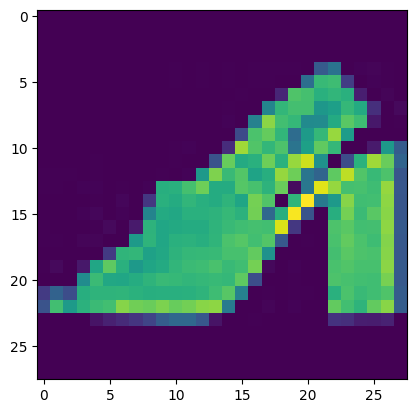

(128, 28, 28, 1)

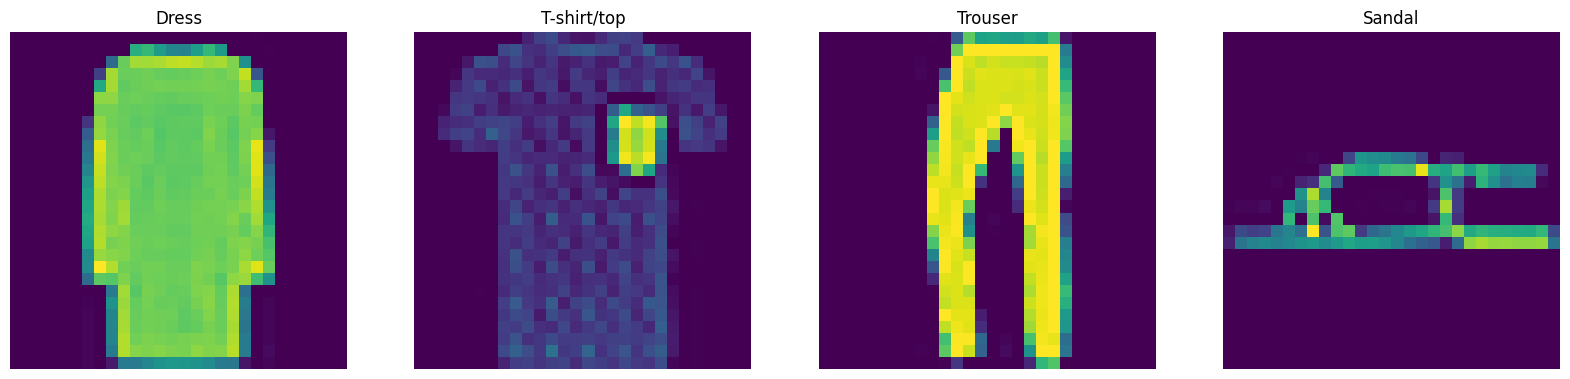

# 3. Build neural Network

In [9]:
# Bring in the Sequential api for the generator and discriminator
from keras.models import Sequential
from keras.layers import Conv2D , Dense , Flatten , UpSampling2D , ReLU , LeakyReLU , Dropout , BatchNormalization , Reshape, Conv2DTranspose


## 3.1 Build Generator

In [35]:
def build_generator():
    model = Sequential([
        Dense(7 * 7 * 128, input_dim=128),
        LeakyReLU(0.2),
        Reshape((7, 7, 128)),

        UpSampling2D(),
        Conv2D(128, 5, padding='same'),
        BatchNormalization(),
        LeakyReLU(alpha=0.2),

        UpSampling2D(),
        Conv2D(128, 5, padding='same'),
        LeakyReLU(alpha=0.2),


        Conv2D(128, 5, padding='same'),
        LeakyReLU(alpha=0.2),

        Conv2D(128, 5, padding='same'),
        LeakyReLU(alpha=0.2),
        BatchNormalization(),

        LeakyReLU(alpha=0.2),
        Conv2D(1 , 5, padding='same',activation="sigmoid")

    ])
    return model
generator = build_generator()
generator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_2 (UpSamplin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 128)       409728    
                                                                 
 batch_normalization_2 (Bat  (None, 14, 14, 128)       512       
 chNormalization)                                     

## 3.2 Visulise the generated image from generator

1/1 [==============================] - 2s 2s/step


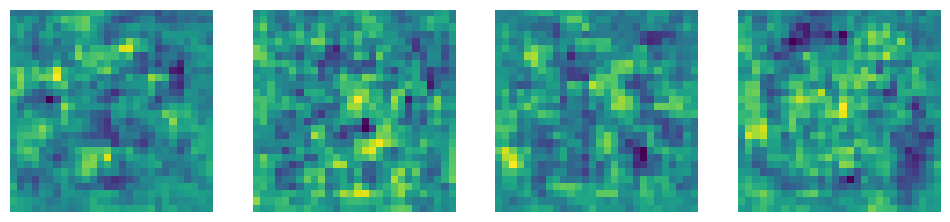

In [11]:
img = generator.predict(np.random.randn(4, 128,1))

# Choose random indices from the training dataset
random_indices = random.sample(range(len(ds)), 4)

# Plot the images
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
for i, idx in enumerate(random_indices):
    ax[i].imshow(img[i].squeeze())  # Assuming grayscale images
    ax[i].axis('off')
plt.show()

## 3.3 Build Discriminator

In [12]:
def build_Dicriminator():
    model=Sequential([
        # First Conv Block
        Conv2D(32, 5 , input_shape=(28,28,1)),
        LeakyReLU(0.2),
        Dropout(0.4),

        # second conv Block
        Conv2D(64, 5, input_shape=(28,28,1)),
        LeakyReLU(0.2),
        Dropout(0.4),

        #third conv Block
        Conv2D(128, 5 , input_shape=(28,28,1)),
        LeakyReLU(0.2),
        Dropout(0.4),

        # Forth Conv Block
        Conv2D(256, 5 , input_shape=(28,28,1)),
        LeakyReLU(0.2),
        Dropout(0.4),

         # Fifth Conv Block
        Conv2D(256, 5 , input_shape=(28,28,1)),
        LeakyReLU(0.2),
        Dropout(0.4),

        Flatten(),
        Dropout(0.4),
        Dense(1 , activation="sigmoid")

    ])
    return model

discriminator = build_Dicriminator()
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [13]:
discriminator.predict(img)

1/1 [==============================] - 1s 732ms/step


array([[0.4932667 ],
       [0.49318922],
       [0.49329883],
       [0.49318758]], dtype=float32)

# 4 Create Training Loops

## 4.1 Set Optimizers and Losses parameter

In [14]:
# Adam is going to be the optimizer for both
from keras.optimizers import Adam
# BinaryCrossentropy is going to be the optimizer for both
from keras.losses import BinaryCrossentropy

In [28]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)

g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [16]:
from keras.models import Model

## 4.2 Build Subclass Model

In [43]:
class FashionGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class
        super().__init__(*args, **kwargs)

        # Create attributes for gen and disc
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        # Compile with base class
        super().compile(*args, **kwargs)

        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss

    def train_step(self, batch):
        # Get the data
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)

        # Train the discriminator
        with tf.GradientTape() as d_tape:
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)

            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)

            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)

            # Calculate loss - BINARYCROSS
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)

        # Apply backpropagation - nn learn
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

        # Train the generator
        with tf.GradientTape() as g_tape:
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)

            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)

            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [44]:
#Create instance of Subclass mode
fashgan=FashionGAN(generator , discriminator)

## 4.3 Compile the Model

In [46]:
# Compile the model
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

## 4.4 Build Callback

In [47]:
import os
from keras.preprocessing.image import array_to_img
from keras.callbacks import Callback

In [48]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])

## 4.5 Train Model

In [49]:
hist = fashgan.fit(ds, epochs=20, callbacks=[ModelMonitor()])

Epoch 1/20
  6/469 [..............................] - ETA: 2:40 - d_loss: 0.6920 - g_loss: 0.6781

469/469 [==============================] - 169s 320ms/step - d_loss: 0.6961 - g_loss: 0.6837
Epoch 2/20
469/469 [==============================] - 148s 316ms/step - d_loss: 0.6937 - g_loss: 0.6844
Epoch 3/20
469/469 [==============================] - 139s 297ms/step - d_loss: 0.6919 - g_loss: 0.6783
Epoch 4/20
469/469 [==============================] - 142s 303ms/step - d_loss: 0.6943 - g_loss: 0.6688
Epoch 5/20
469/469 [==============================] - 154s 328ms/step - d_loss: 0.6843 - g_loss: 0.6568
Epoch 6/20
469/469 [==============================] - 141s 301ms/step - d_loss: 0.6688 - g_loss: 0.6128
Epoch 7/20
469/469 [==============================] - 151s 322ms/step - d_loss: 0.4559 - g_loss: 0.1256
Epoch 8/20
469/469 [==============================] - 143s 305ms/step - d_loss: 0.3305 - g_loss: 0.0240
Epoch 9/20
469/469 [==============================] - 148s 315ms/step - d_loss: 0.3298 - g_loss: 0.0259
Epoch 10/20
469/469 [==============================] - 140s 299ms/step - d_

# 4.3 Review Performance

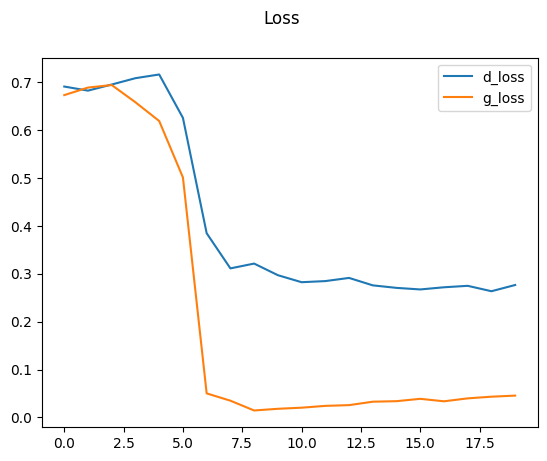

In [50]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

# 5. Test Out the Generator

## 5.1 Save the Model

In [ ]:
generator.save('generator.h5')
discriminator.save('discriminator.h5')

## 5.2 Generate Images

In [53]:
loaded_model = keras.models.load_model("/content/generatormodel.h5")

In [60]:
imgs = loaded_model.predict(tf.random.normal((16, 256, 1)))
img12 = generator.predict(tf.random.normal((16, 128, 1)))

1/1 [==============================] - 0s 72ms/step


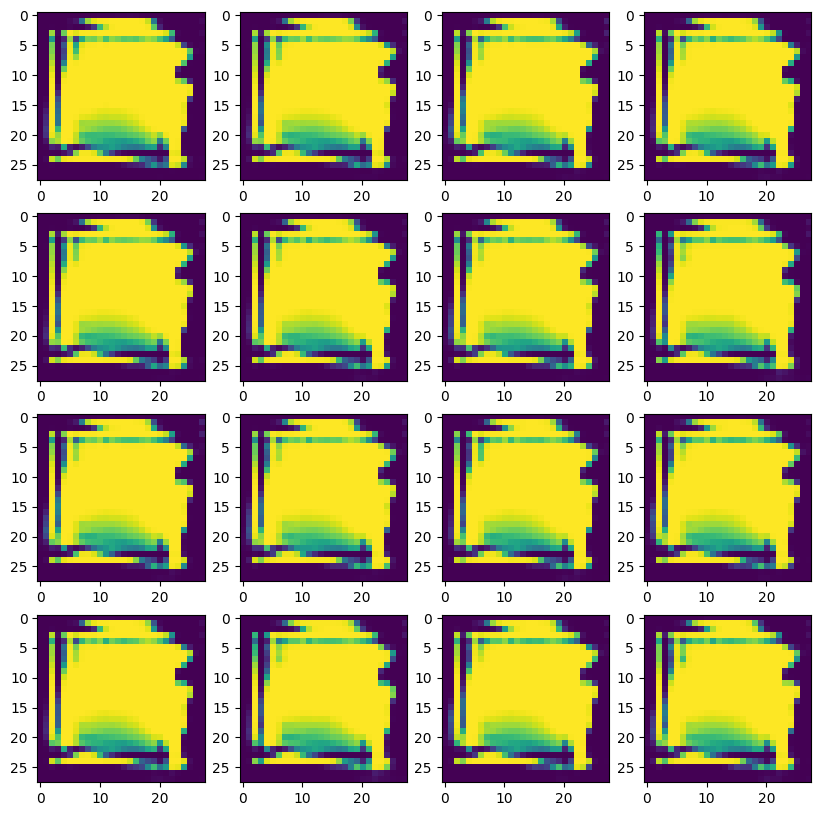

In [61]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4):
    for c in range(4):
        ax[r][c].imshow(img12[(r+1)*(c+1)-1])